In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap 
#import janitor
import warnings
warnings.filterwarnings('ignore')

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('datasets/test.csv')

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [4]:
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717
49999,0x25ff1,CUS_0x942c,December,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,_,502.38,34.108530,32 Years and 2 Months,No,35.104023,220.45787812168732,Low_spent_Medium_value_payments,360.37968260123847


In [5]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [7]:
df.nunique()

ID                          50000
Customer_ID                 12500
Month                           4
Name                        10139
Age                           976
SSN                         12501
Occupation                     16
Annual_Income               16121
Monthly_Inhand_Salary       12793
Num_Bank_Accounts             540
Num_Credit_Card               819
Interest_Rate                 945
Num_of_Loan                   263
Type_of_Loan                 6260
Delay_from_due_date            73
Num_of_Delayed_Payment        443
Changed_Credit_Limit         3927
Num_Credit_Inquiries          750
Credit_Mix                      4
Outstanding_Debt            12685
Credit_Utilization_Ratio    50000
Credit_History_Age            399
Payment_of_Min_Amount           3
Total_EMI_per_month         13144
Amount_invested_monthly     45450
Payment_Behaviour               7
Monthly_Balance             49433
dtype: int64

In [12]:
df.shape

(50000, 27)

In [8]:
df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

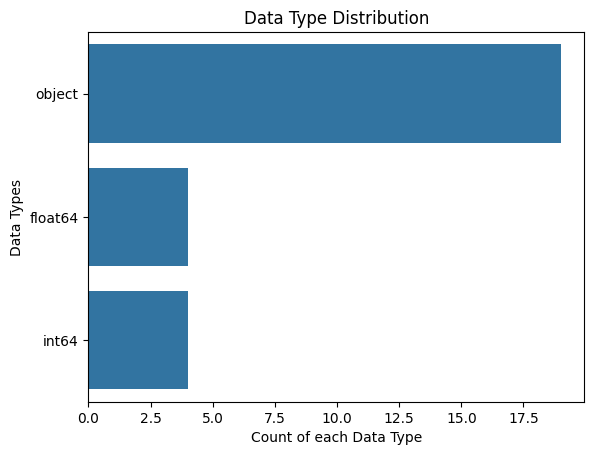

In [9]:
sns.countplot(y=df.dtypes, data=df)
plt.title('Data Type Distribution')
plt.xlabel('Count of each Data Type')
plt.ylabel('Data Types')
plt.show()

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
uni_loans = df['Type_of_Loan'].unique()

print(uni_loans)

['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']


In [13]:
df.dropna(axis=0, inplace=True)

In [14]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [15]:
df.shape

(26459, 27)

In [16]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.986667,2,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783
9,0x1623,CUS_0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.220000,1,...,3.0,Good,1303.01,35.685836,18 Years and 6 Months,No,246.992319,453.6151305781054,Low_spent_Large_value_payments,788.1145499681528
12,0x162e,CUS_0xb891,September,Jasond,55,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,4.0,Good,632.46,39.377219,17 Years and 11 Months,No,16.415452,69.10700584725082,High_spent_Medium_value_payments,425.7266258262577
13,0x162f,CUS_0xb891,October,Jasond,55,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,4.0,_,632.46,36.280475,18 Years and 0 Months,No,16.415452,29.393311428984493,High_spent_Large_value_payments,455.440320244524
14,0x1630,CUS_0xb891,November,Jasond,55,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,4.0,Good,632.46,36.824468,18 Years and 1 Months,No,16.415452,191.88624358002707,Low_spent_Medium_value_payments,332.9473880934814
15,0x1631,CUS_0xb891,December,Jasond,55,072-31-6145,Entrepreneur,4148862.0,2612.490833,2,...,7.0,Good,632.46,35.579265,18 Years and 2 Months,No,16.415452,233.93341714114612,Low_spent_Small_value_payments,300.90021453236227


In [17]:
drop_columns = ['ID', 'Customer_ID', 'Name, SSN']

In [26]:
df = df.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN'])

KeyError: "['ID', 'Customer_ID', 'Name', 'SSN'] not found in axis"

In [27]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,September,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,October,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
4,September,28,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
5,October,28,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617
7,December,28,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,...,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783


In [28]:
df = df.drop(columns=['Month'])

In [29]:
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
4,28,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
5,28,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617
7,28,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783


In [30]:
df.Occupation.unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Mechanic',
       'Writer', 'Accountant', 'Architect', 'Manager', 'Musician',
       'Developer'], dtype=object)